In [1]:
import pandas as pd

/var/folders/_1/0bglz1893_39b3r9vqplvnjc0000gn/T/ipykernel_81551/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [38]:
train = pd.read_csv('archive/mitbih_train.csv', header=None)
test = pd.read_csv('archive/mitbih_test.csv', header=None)

X_train, y_train = train.iloc[:, :187].values, train.iloc[:, 187].values
X_test, y_test = test.iloc[:, :187].values, test.iloc[:, 187].values

# Reshape the input data to (samples, 187, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

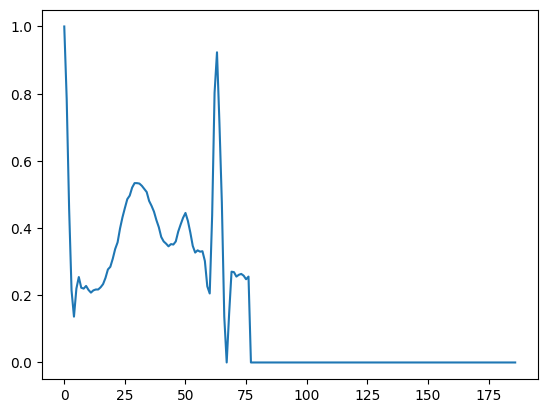

In [39]:
import matplotlib.pyplot as plt

plt.plot(X_train[100])

In [40]:
from tensorflow import keras
load_model = keras.models.load_model(f'/my_model.keras')

ValueError: File not found: filepath=/my_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [55]:
test_loss, test_accuracy = load_model.evaluate(X_test, y_test)

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9582 - loss: 0.1627


In [59]:
arrays = [i[0] for i in X_test[0].tolist()]

In [60]:
arrays

[1.0,
 0.7582644820213318,
 0.11157024651765823,
 0.0,
 0.08057851344347,
 0.07851240038871765,
 0.06611569970846176,
 0.04958677664399147,
 0.047520659863948815,
 0.03512396663427353,
 0.03099173493683338,
 0.02892562001943588,
 0.03512396663427353,
 0.026859503239393238,
 0.039256200194358826,
 0.03512396663427353,
 0.043388430029153824,
 0.047520659863948815,
 0.053719006478786475,
 0.053719006478786475,
 0.07024793326854706,
 0.0723140463232994,
 0.0847107470035553,
 0.09710744023323059,
 0.12190082669258116,
 0.13223139941692352,
 0.1694214940071106,
 0.1962809860706329,
 0.21487602591514587,
 0.23553718626499176,
 0.2541322410106659,
 0.26446279883384705,
 0.28512397408485407,
 0.27272728085517883,
 0.2665289342403412,
 0.23966942727565765,
 0.21487602591514587,
 0.17355372011661527,
 0.1570248007774353,
 0.12396693974733353,
 0.12190082669258116,
 0.10743801295757292,
 0.10537189990282057,
 0.09710744023323059,
 0.10537189990282057,
 0.09917355328798294,
 0.10537189990282057,
 0

In [63]:
import numpy as np
x = np.array(arrays).reshape(1, 187, 1)
label = load_model.predict(x)
print("Predicted label:", np.argmax(label))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted label: 0


['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

	1.	N (Normal beat) - Nhịp tim bình thường.
	2.	S (Supraventricular ectopic beat) - Nhịp tim bất thường do ngoại tâm thu từ phía trên thất (trên thất).
	3.	V (Ventricular ectopic beat) - Nhịp tim bất thường do ngoại tâm thu từ thất (nhịp thất).
	4.	F (Fusion beat) - Nhịp hợp nhất, khi nhịp xoang và nhịp bất thường xảy ra đồng thời, gây ra một phức hợp sóng “hợp nhất”.
	5.	Q (Unclassifiable beat) - Nhịp không thể phân loại, thường là các dạng nhịp không bình thường hoặc nhiễu mà hệ thống không phân loại được.

In [2]:
import pandas as pd
df = pd.read_csv("/Users/nguyeqoctih/Code/iot/heartrates-lie.csv")
df["value"] = df["value"].apply(lambda x: list(map(float, x.split(","))))

/var/folders/_1/0bglz1893_39b3r9vqplvnjc0000gn/T/ipykernel_82026/3140049363.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df.head()

,value
0,"[540.0, 535.0, 535.0, 535.0, 536.0, 544.0, 545..."
1,"[398.0, 570.0, 560.0, 572.0, 605.0, 633.0, 656..."
2,"[518.0, 526.0, 532.0, 535.0, 541.0, 536.0, 536..."
3,"[574.0, 449.0, 489.0, 584.0, 595.0, 608.0, 619..."
4,"[488.0, 486.0, 486.0, 492.0, 490.0, 485.0, 481..."


In [4]:
1600/75

21.333333333333332

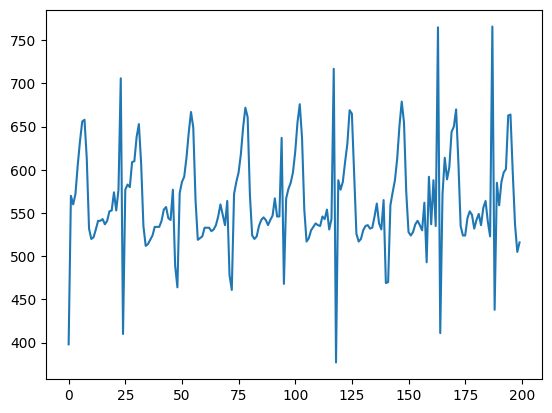

In [5]:
from matplotlib import pyplot as plt
plt.plot(df["value"][1][:200])

In [6]:
len(df["value"][1])

1600

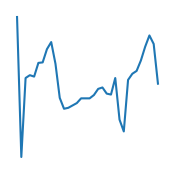

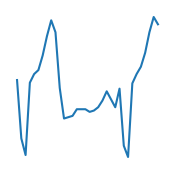

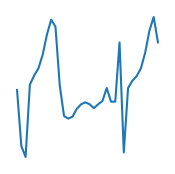

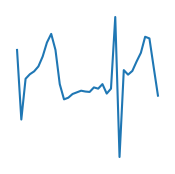

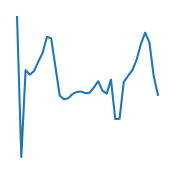

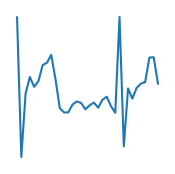

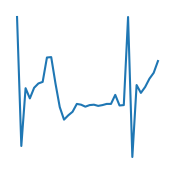

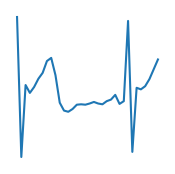

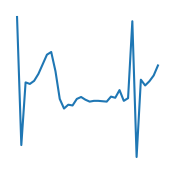

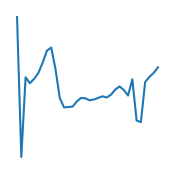

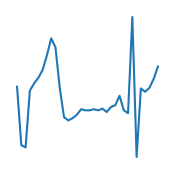

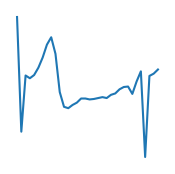

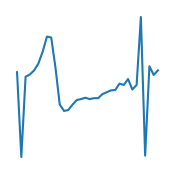

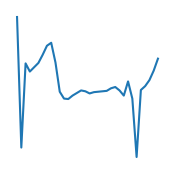

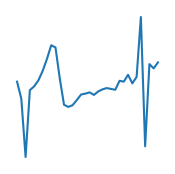

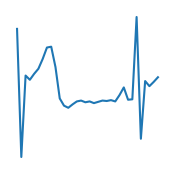

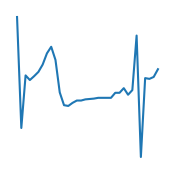

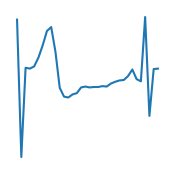

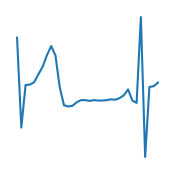

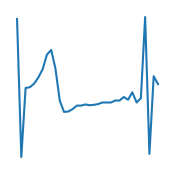

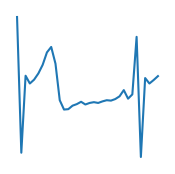

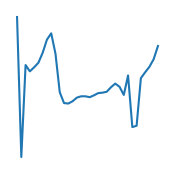

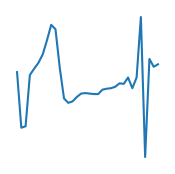

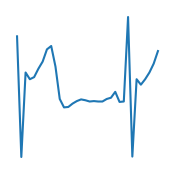

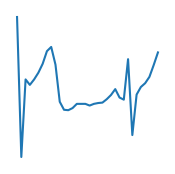

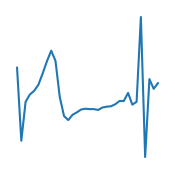

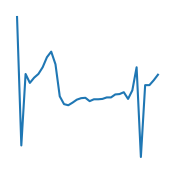

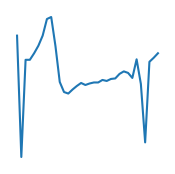

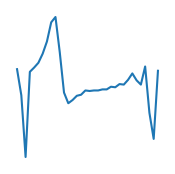

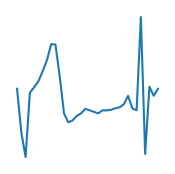

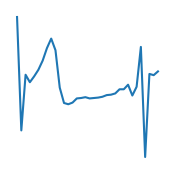

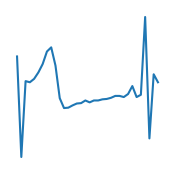

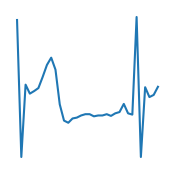

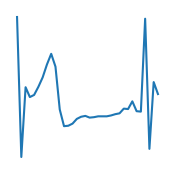

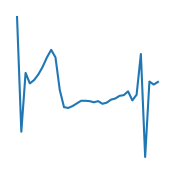

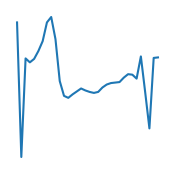

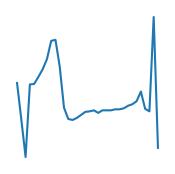

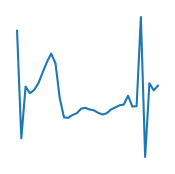

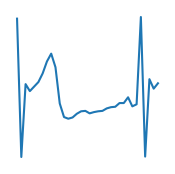

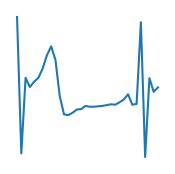

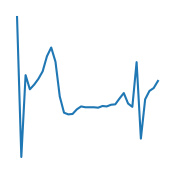

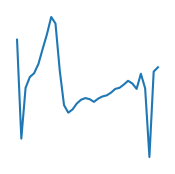

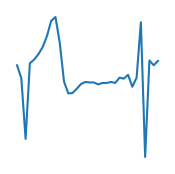

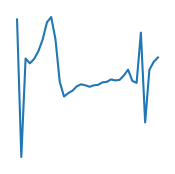

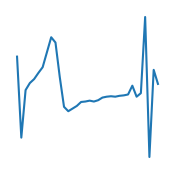

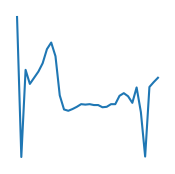

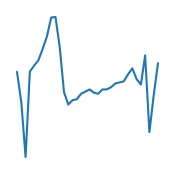

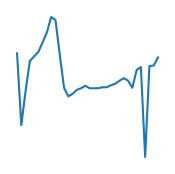

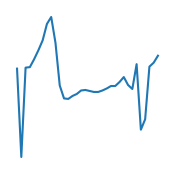

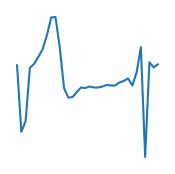

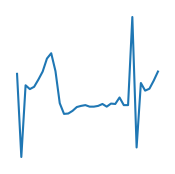

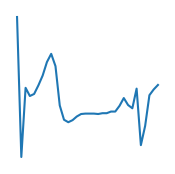

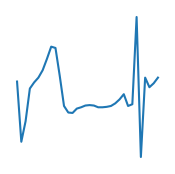

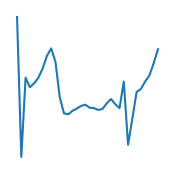

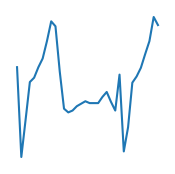

56


In [37]:
import numpy as np
import neurokit2 as nk
import os
import os.path as osp
import shutil
import matplotlib.pyplot as plt

# Sample frequency and loading signal data
sr = 33  # sample frequency
signal = df["value"][1]
MIN_DIFF = 13  # Minimum distance for peak adjustment

# Detect R-peaks and refine with delineation
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=sr)

# Convert R-peaks to integer array
rpeaks = rpeaks['ECG_R_Peaks'].astype(int)


# Plot configuration
mode = 24  # width of the segment to plot

# Plot and save each segment
def plotIMG(data, figsize):
    plt.figure(figsize=figsize)
    plt.plot(data)
    plt.axis('off')
    plt.show()
    plt.close()

for i, peak in enumerate(rpeaks):
    left, right = peak, peak + mode + 10
    if np.all([left > 0, right < len(signal)]):
        plotIMG(signal[left:right], (2,2))

print(len(rpeaks))

In [43]:
predictions = [
    [0.1, 0.2, 0.1, 0.2, 0.4],
    [0.2, 0.1, 0.1, 0.25, 0.35],
    [0.1, 0.3, 0.2, 0.2, 0.2]
]

index = np.argmax(predictions, axis=1)
print(index)

unique, counts = np.unique(index, return_counts=True)
most_frequent_label = unique[np.argmax(counts)]
print("Nhãn có nhiều mẫu nhất:", most_frequent_label)

[4 4 1]
Nhãn có nhiều mẫu nhất: 4
